# The Koopman model - Robinson Crusoe economy

**What is the Robinson Crusoe economy?**

Imaging the classic everyday first world problem. You are on your way to a tropical paradise for the holidays, but on the way your plane crashes and leaves you stranded on a deserted island. As a human being, you have to eat in order to survive and the island only has two kinds of food supplies. You can either use your time on fishing or pick bananas. Each activity consumes time of the day, which you would rather spend on relaxation/leisure (since this technically is your holiday). As a rational utility optimizing individual with understanding of economic efficient decision making, you now have to decide how to allocate your time in order to achieve the maximum amount of utility (remeber it is you holiday, so you should get the most out of it).

# The model for optimizing your holiday

**The stats of you character**

The first question is how efficient your are at producing each of the two goods. The goods are given as:
1. Bananas (B)
* Fish (F)

The production of the two goods only require time as input, which leads to an alternative cost of lost leisure. Time will be abbreviated as L, while the inputs are abbreviated as $L_F$ and $L_B$. The production function for each good is given as follows:

$$ B = \sqrt{L_B} ,  F = \frac{\sqrt{L_F}}{2} $$

The utility you gain from the total consumption of each good is expressed by the utility function

$$ U(B,F) = \sqrt{B}\sqrt{F} $$

The final part to consider is the amount of inputs you have available at you disposal. A day consist of 24 hours, so the total time $L$ most be equal to 24. These 24 hours has to be distributed between production of fish and bananas and some type of leisure $l$ (a person has to sleep some time at least). The total amount of available inputs can then be characterized as 
$$ L = L_B + L_F + l = 24 $$

Now that the model is presented, we begin to solve for the pareto efficient allocation of time between the two goods. 

# The pareto efficient allocation

First we need to determine **the Production Possibilities Frontier (PPF)**, which defines all the efficiently combinations to produce of fish and bananas. In other words, it is the frontier where it is not possible to produce more of both goods by reallocating time, $L$.

We start by importing the relevant **packages**

In [363]:
# Import relevant packages
import sympy as sm
from sympy.plotting import plot_implicit
import math as m
import matplotlib.pyplot as plt
import numpy as np

We then define all **symbols** for our analytical solution

In [364]:
# Symbols for the Sympy optimization
l    = sm.symbols('l')
LF   = sm.symbols('LF')
LB   = sm.symbols('LB')
B    = sm.symbols('B')
F    = sm.symbols('F')
U    = sm.symbols('U')
L    = sm.symbols('L')
T    = sm.symbols('T')
PPF  = sm.symbols('PPF')

Now we use the symbols to set up our **model** in Sympy

In [365]:
# leisure (time for sleep and fun)
l = 8
# Total amount of time available for production
L = 24-l

# Defining time spend on producing fish (it is arbitrary whether we isolate LF or LB) 
LF = L - LB

# The production functions
Bprod = sm.Eq(B,LB**0.5)
Fprod = sm.Eq(F,LF**0.5/2)

# Utility function
U = B**0.5*F**0.5
Utility = sm.Eq(U,B**0.5*F**0.5)

The **PPF is then found** by isolating the time spend on picking bananas $L_B$ in both production functions, setting them equal and move all variables to the right hand side.

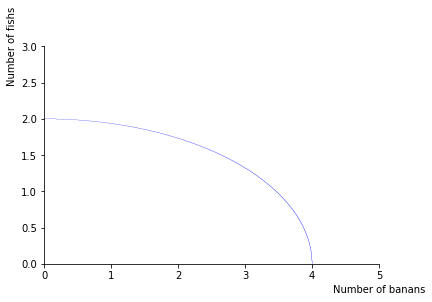

In [366]:
# Solution when isolation LB in Banana production function
solB = sm.solve(Bprod,LB)
# Solution when isolation LB in Fishing production function
solF = sm.solve(Fprod,LB)

# The Production Possibilities Frontier
T = solB[0]-solF[0]
PPF = sm.Eq(0,T)

# Plot of the PPF from the symbolic definition (here L is set to 16)
plot_implicit((T), x_var=(B, 0, 5), y_var=(F, 0, 3), xlabel='Number of banans', ylabel='Number of fishs');

**The Pareto Efficient allocation** is the point on the PPF, where the utility is maximized. The problem is stated as follows

\\[
\begin{eqnarray*}
& \max_{B,F}U(B,F)\\
& \text{s.t.}\\
& PPF(B,F) = 0
\end{eqnarray*}
\\]

To solve the problem, **the Lagrangian is constructed and solved** w.r.t. B, F and $\lambda$

$$ \max_{B,F,\lambda}\mathcal{L}(B,F,\lambda) = \sqrt{B}\sqrt{F}+\lambda(PPF(B,F)-0) $$

**The first order conditions** (FOC) is calculated as follows

In [367]:
# The symbol for lambda is defined as 'lam'
lam  = sm.symbols('lam')
# The Lagrangian is defined
Lag = B**0.5*F**0.5+lam*(T-0)

# The FOC for each variable is found
# FOC for Bananas
diffB = Lag.diff(B)
# FOC for Fish
diffF = Lag.diff(F)
# FOC for lambda
difflam = Lag.diff(lam)

# The FOC's are then printed
print('FOC for Bananas: {} = 0'.format(diffB))
print('FOC for Fish:    {} = 0'.format(diffF))
print('FOC for lambda:  {} = 0'.format(difflam))

FOC for Bananas: 0.5*B**(-0.5)*F**0.5 + 2*B*lam = 0
FOC for Fish:    0.5*B**0.5*F**(-0.5) + 8.0*F*lam = 0
FOC for lambda:  B**2 + 4.0*F**2 - 16.0 = 0


**The equation system with three unknowns**

The way we find the pareto efficient allocation of the two goods, is to **solve the equation system** of the three FOC's equations with three unknown variables. The equation system is given as

\\[
\begin{eqnarray*}
\frac{\partial\mathcal{L}(B,F,\lambda)}{\partial B}      & = & \frac{1}{2}\frac{\sqrt{F}}{\sqrt{B}} + 2B\lambda & = & 0\\
\frac{\partial\mathcal{L}(B,F,\lambda)}{\partial F}      & = & \frac{1}{2}\frac{\sqrt{B}}{\sqrt{F}} + 8F\lambda & = & 0\\
\frac{\partial\mathcal{L}(B,F,\lambda)}{\partial\lambda} & = & B^2 + 4F^2 - L & = & 0
\end{eqnarray*}
\\]

**The solution is found in 4 steps:**
1. First we use the first two equation to define lambda with B and F
* Lambda is then inserted into the second equation to get an expression for B, defined by F
* The expression for B is then inserted into the third equation to isolate for F
* The expression for F is finally inserted into the expression for B

The final expression for B and F is the pareto efficient allocation of the two goods, given the amount of time you will spend on total production.

**Step 1** is to set eq. 1 and 2 equal and find lambda defined by B and F:

In [368]:
# Setting eq. 1 and 2 equal
e1 = sm.Eq(diffB,diffF)

# Solve the equation for lambda
lams = sm.solve(e1, lam)

# Save the first result from the list as a variable and print it
lams = lams[0]
print('Lambda = {}'.format(lams))

Lambda = 0.25*(B - F)/(sqrt(B)*sqrt(F)*(B - 4.0*F))


**Step 2** is to insert lambda into equation 2 in our system and solve for B: 

In [369]:
# Lambda inserted into equation 2
e2 = sm.Eq(0.5*B**(-0.5)*F**0.5 + 2*B*lams,0)

# B is defined by F
Bs = sm.solve(e2, B)

# Save the result in a variable and print it
Bs = Bs[1]
print('B = {}'.format(Bs))

B = 2.0*F


**Step 3** is to define F by inserting the expression for B into equation 3 

In [370]:
# we want an analytical solution, so we define a new variable for total production input, L2
L2 = sm.symbols('L2')

# B is inserted into equation 3
e3 = sm.Eq(Bs**2 + 4*F**2 - L2,0)

# We solve for F
F_eff = sm.solve(e3, F)
F_eff = F_eff[1]
print('F* = {}'.format(F_eff))

F* = 0.353553390593274*sqrt(L2)


**Step 4** uses the efficient amount of F to find the efficient amount of B

In [371]:
# Insert efficient amount of F 
B_eff = 2.0*F_eff

# Print the result
print('B* = {}'.format(B_eff))

B* = 0.707106781186548*sqrt(L2)


Finally we print both definitions to get a clear view of the results

In [372]:
print('B* =', B_eff)
print('F* =', F_eff)

B* = 0.707106781186548*sqrt(L2)
F* = 0.353553390593274*sqrt(L2)


The pareto efficient allocation of the goods on the Production Function Frontier is defined as a function of the total input for production, known as the time, $L$.

\\[
\begin{eqnarray*}
Bananas & = & 0.707106781186548\cdot\sqrt{L} & \approx 0.71\cdot\sqrt{L}\\
Fish    & = & 0.353553390593274\cdot\sqrt{L} & \approx 0.35\cdot\sqrt{L}
\end{eqnarray*}
\\]


In [373]:
L2 = 16
B2 = 0.707106781186548*sm.sqrt(L2)
F2 = 0.353553390593274*sm.sqrt(L2)
print('Pareto efficient amount of:')
print('Bananas =', B2)
print('Fish    =', F2)

Pareto efficient amount of:
Bananas = 2.82842712474619
Fish    = 1.41421356237310


**Other combinations:** It would also be interesting to see how the allocation of the goods are when another amount of production input is used. Below is the allocations calculated for different amounts of hour input.

In [374]:
Labor = np.linspace(1,16,7)
for L2 in Labor:
    B2 = 0.707106781186548*sm.sqrt(L2)
    F2 = 0.353553390593274*sm.sqrt(L2)
    print(f'for an hour input of {L2:} the production of bananas = {B2:.1f} and fish = {F2:.1f}' ) 

for an hour input of 1.0 the production of bananas = 0.7 and fish = 0.4
for an hour input of 3.5 the production of bananas = 1.3 and fish = 0.7
for an hour input of 6.0 the production of bananas = 1.7 and fish = 0.9
for an hour input of 8.5 the production of bananas = 2.1 and fish = 1.0
for an hour input of 11.0 the production of bananas = 2.3 and fish = 1.2
for an hour input of 13.5 the production of bananas = 2.6 and fish = 1.3
for an hour input of 16.0 the production of bananas = 2.8 and fish = 1.4


**Plot the final result:** The pareto efficent point on the PPF and the utility function is illustrated with their tangent line

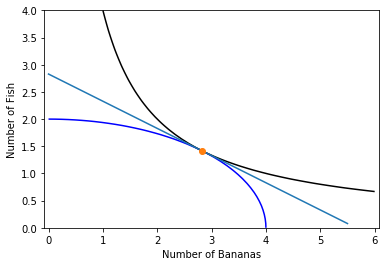

In [375]:
# Define symbols for the plot
B = sm.symbols('B')
F = sm.symbols('F')
k = sm.symbols('k')

# We start by finding the tangent to the pareto efficient point on PPF
MRS = U.diff(B)/U.diff(F)    # Marginal Rate of Substitution (MRS) gives the slope of the tangent in the point
MRS = sm.lambdify([B,F],MRS) # Lambdify MRS to ease the process of inserting the optimal point

Tan = sm.Eq(F2,k-0.5*B2)                  # The tangent is defined by this equation for the efficient point
k   = sm.solve(Tan,k)                     # Now we solve for the constant of the equation
Tan = sm.lambdify(B,-MRS(B2,F2)*B + k[0]) # The final equation lambdifyed to ease the process of drawing the equation

# The grid for the plot is constructed
fig, ax = plt.subplots(1,1)
xax,yax = np.linspace(0,6), np.linspace(0,4)
B, F = np.meshgrid(xax,yax)
ax.set_xlabel('Number of Bananas')
ax.set_ylabel('Number of Fish')

# Contour of the PPF
ax.contour(B, F, B**2 + 4*F**2 - L2, [0], colors=('b',));

# Contour of the utility function
ax.contour(B, F, B**0.5*F**0.5, [2], colors=('k'));

# Points array for the plot of the tangent
y = np.array([Tan(0),Tan(1),Tan(2),Tan(3),Tan(4),Tan(5),Tan(5.5)])
x = np.array([0,1,2,3,4,5,5.5])
ax.plot(x,y)

# We insert a point for the pareto efficient allocation of the goods
ax.plot([B2],[F2],"o")
ax.set_aspect('equal','datalim')

**Conclusion:**
The blue curve is the PPF, the black curve is the utility function and the tangent to the orange point is the tangent where $MRS=MRT$. The orange point is then the optimal allocation of fish and banans. So what did we learn here? If you think this model represent your productivity, you will optimize you utility on the island by using 16 hours on: 
* Fishing 1,5 fish
* Pick almost 3 banans (banana trees are hard to scale)
* Probably get a hell of a lot of mosquito bites

The next part will look at how comparative advantages between agents is able to raise the level of utility.

# Comparative advantage


An common extention to the Koopman model is to include an extra person with a different production function. Each person will be better at producing one of the two goods and by trading between each other, they can recieve a higher utility, given that they have a **comparative advantage**.

Another way of looking at this type of extension is to see the increase in productivity from another person on the island, as an increase in the technology level in a simple Cobb-Douglas production function. 

$$ c = A\cdot k^{1-\alpha}\cdot L^{\alpha} $$

The model is mixed up in this part, so instead of choosinn between two goods, the amount of the goods is collected in a varaible of total consumption. The agent in this model now gain utility from total consumption, $c$ and leisure $1-L$, where $L$ is the share of daily hours used for prodution.

Before we get into the model, we start by looking at the new production function. We start by define a function for the level of produced consumption:

In [376]:
# Function for the level of consumption produced
def consum(k,L,alpha=0.50,A=1):
    return A*k**(1-alpha)*L**alpha

# Setting initial values
N = 100 # number of elements
x_max = 10 # maximum value

# Allocate numpy arrays
shape_tuple = (N,N)
k_values = np.empty(shape_tuple)
L_values = np.empty(shape_tuple)
c_values = np.empty(shape_tuple)

# Data points
for i in range(N): # 0,1,...,N-1
    for j in range(N): # 0,1,...,N-1
        k_values[i,j] = (i/(N-1))*x_max # in [0,x_max]
        L_values[i,j] = (j/(N-1))*x_max # in [0,x_max]
        c_values[i,j] = consum(k_values[i,j],L_values[i,j],alpha=0.5,A=1)

The function above fills three arrays with values for the capital, labor and consumption. The parameter $\alpha$ is set to $0.5$ and technology, $A=1$. The production function is illustrated below in 3D. Later we are gonna simplify the task by setting $k=1$. If you are stranded on a deserted island, you do not have any capital to work with, so the production function will be normalized. 

In [377]:
%matplotlib widget
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm # for colormaps

# Plotting the figure
fig = plt.figure() # create the figure
ax = fig.add_subplot(1,1,1,projection='3d') # create a 3d axis in the figure 
ax.plot_surface(k_values,l_values,c_values,cmap=cm.magma); # create surface plot in the axis

# Adding labels
ax.set_xlabel('$Capital$')
ax.set_ylabel('$Labor$')
ax.set_zlabel('$Consumption$')
plt.title('Production function for goods of consumption')

# Adjusting the axis
ax.invert_xaxis()
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

FigureCanvasNbAgg()

In [378]:
# This has to run, so the next illustrations are not interactive.
%matplotlib inline

The graph gives a nice presentation of our production function in an interactive plot. The model for the rest of the notebook only looks at a "slice" of the 3D plot, to be exact, the slice is in the layer where $k=1$. 

# Presenting the new model

The model consist of a total consumption level, given by the production function, a share of time used for leisure and a utility function, where leisure and consumption provide utility for the agent.


\\[
\begin{eqnarray*}
Production:\; & c & = & A\cdot L^{\alpha}\\
Utility:\;    & U & = & ln(c) + ln(1-L)\\
Leisure:\;    & l & = & 1-L
\end{eqnarray*}
\\]

We write up the model in the following way:

In [379]:
# Symbols for the new model is defined
L     = sm.symbols('L') # Labor in production
A     = sm.symbols('A') # Technology
c     = sm.symbols('c') # Consumption
lamb  = sm.symbols('lamb') # Lambda
alpha = sm.symbols('alpha') # Alpha

# The functions of the model
f = A*L**alpha            # Production function for goods of consumption
uf = sm.ln(c)+sm.ln(1-L)  # Utility function

**The problem to be solved:** 

The optimization problem the agent on the deserted island now faces is how much time to allocate for leisure and how much for production of consumption goods. The effects of comparative advantage will be clear when we start to adjust on the size for $A$, but first we solve the model analytically. The agent has to maximize the utility w.r.t leisure and consumption, where the level of consumption can not exceed the produced amount:

\\[
\begin{eqnarray*}
& \max_{L,c}U(L,c)\\
& \text{s.t.}\\
& A\cdot L^{\alpha} = c
\end{eqnarray*}
\\]

To solve the problem, **the Lagrangian is constructed and solved** w.r.t. L, c and $\lambda$

$$ \max_{L,c,\lambda}\mathcal{L}(L,c,\lambda) = ln(c) + ln(1-L) + \lambda(A\cdot L^{\alpha}-c) $$

The **FOC's** for each variable is defined below:

In [380]:
# The Lagrangian
Lag = uf + lamb*(f - c)

# The FOC for each variable is found

# FOC for Consumption
dc    = Lag.diff(c)
# FOC for Labor
dL    = Lag.diff(L)
# FOC for lambda
dlamb = Lag.diff(lamb)

# The FOC's are then printed
print('FOC for Consumption: {} = 0'.format(dc))
print('FOC for Labor:       {} = 0'.format(dL))
print('FOC for Lambda:      {} = 0'.format(dlamb))

FOC for Consumption: -lamb + 1/c = 0
FOC for Labor:       A*L**alpha*alpha*lamb/L - 1/(-L + 1) = 0
FOC for Lambda:      A*L**alpha - c = 0


**The equation system with three unknowns**

The optimal choice of consumption and leisure, is found by **solving the equation system** of the three FOC's equations with three unknown variables. The equation system is given as

\\[
\begin{eqnarray*}
\frac{\partial\mathcal{L}(L,c,\lambda)}{\partial L}      & = & \frac{1}{c} - \lambda & = & 0\\
\frac{\partial\mathcal{L}(L,c,\lambda)}{\partial c}      & = & A\cdot L^{\alpha}\cdot\alpha\frac{\lambda}{L} - \frac{1}{1-L} & = & 0\\
\frac{\partial\mathcal{L}(L,c,\lambda)}{\partial\lambda} & = & A\cdot L^{\alpha} - c & = & 0
\end{eqnarray*}
\\]

The system is alot easier to solve, so a single line of code is all we neew for this.

In [381]:
# The equation system with three equations and three unknown is solved by
Lag_sol = sm.solve([dc,dL,dlamb],c,L,lamb)

# The solution to the equation system then becomes
print('c*      =  A*((alpha + 1)/alpha)**(-alpha)')
print('L*      =  (((alpha + 1)/alpha)**(-alpha))**(1/alpha)')
print('Lambda* =  (((alpha + 1)/alpha)**alpha/A)')

c*      =  A*((alpha + 1)/alpha)**(-alpha)
L*      =  (((alpha + 1)/alpha)**(-alpha))**(1/alpha)
Lambda* =  (((alpha + 1)/alpha)**alpha/A)


**Simplify the results:**

The optimal allocation for leisure and consumption is simplified to the following expressions:


\\[
\begin{eqnarray*}
c^{*} & = & A\left(\frac{\alpha}{1+\alpha}\right)^{\alpha}\\
L^{*} & = & \frac{\alpha}{1+\alpha}
\end{eqnarray*}
\\]

It is clear to see that the amount of leisure only depends on a parameter, so it will be constant. This constant level stems from the substitution and income effect canceling out. If we become more productive, we do not have to work as much, because we are wealthier with the same amount of labor hours. On the other hand, when we become more productive, we like to work more to increase our utility even further. These effect offsets each other perfectly in this model.

The **comparative advantage** is present in the optimal level of consumption. If technology increase (e.i. a new and more productive agent enters the economy, så the production increases through trade), it is possible to increase the level of consumption and thereby the level of utility in optimium. In the next part, the optimal allocation of leisure and consumption is calcualted for different levels of technology. 

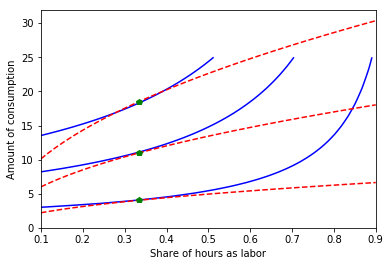

In [382]:
# The grid for the plot is constructed
fig, ax = plt.subplots(1,1)
xax,yax = np.linspace(0.1,0.9), np.linspace(0.01,25)
L, c = np.meshgrid(xax,yax)

# Labels are added
ax.set_xlabel('Share of hours as labor')
ax.set_ylabel('Amount of consumption')

# Parameter levels
alpha = 0.5
A1    = 7
A2    = 19
A25   = 32


# Contour of the utility function
U = np.log(c)+np.log(1-L)
ax.contour(L, c, U, [1,2,2.5], colors=('b'));

# Production functions are calculated for each level of A
def prod1(x):
        return A1*x**alpha
def prod2(x):
        return A2*x**alpha
def prod25(x):
        return A25*x**alpha

# Consumption level for each production function
prod_funk1 = prod1(xax)
prod_funk2 = prod2(xax)
prod_funk25 = prod25(xax)

# The points of optimal leisure and consumption are calculated
L_eff = (((alpha + 1)/alpha)**(-alpha))**(1/alpha)
c1  = A1*((alpha + 1)/alpha)**(-alpha)
c2  = A2*((alpha + 1)/alpha)**(-alpha)
c25 = A25*((alpha + 1)/alpha)**(-alpha)

# The plots and optimums are drawn
ax.plot(xax,prod_funk1,"--""r")   # A = 7
ax.plot(xax,prod_funk2,"--""r")   # A = 19
ax.plot(xax,prod_funk25,"--""r")  # A = 32
ax.plot(L_eff,c1,"p""g");
ax.plot(L_eff,c2,"p""g");
ax.plot(L_eff,c25,"p""g");

**Conclusion:** The graph above shows three different economies with different levels of technology. With a higher level of technology, it is possilbe to obtain a higher level of consumption. This illustrates how the comparative advantage of more specialiced agents in the economy works. If agents produce the good they are best at producing, the level of utility increases through a higher production frontier (the red stippled lines). This is a more general way of showing how comparative advantages works. So if you ever get stranded on a deserted island, always remeber to bring friends.  